In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# sns.set_style('whitegrid')
# from scipy.interpolate import interp1d
# from matplotlib.patches import Patch
# from matplotlib.lines import Line2D
import matplotlib

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
from collections import OrderedDict

colors = OrderedDict([
    ('blue', '#4e79a7'),
    ('orange', '#f28e2b'),
    ('green', '#59a14f'),
    ('red', '#e15759'),
    ('cyan', '#76b7b2'),
    ('purple', '#b07aa1'),
    ('brown', '#9c755f'),
    ('yellow', '#edc948'),
    ('pink', '#ff9da7'),
    ('gray', '#bab0ac')
])

fontsize = dict(
    large=11,
    normal=10,
    small=9,
    tiny=8
)

offblack = '.15'

plt.rcdefaults()
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Lato'],
    'mathtext.fontset': 'custom',
    'mathtext.default': 'it',
    'mathtext.rm': 'sans',
    'mathtext.it': 'sans:italic:medium',
    'mathtext.cal': 'sans',
    'font.size': fontsize['normal'],
    'legend.fontsize': fontsize['normal'],
    'axes.labelsize': fontsize['normal'],
    'axes.titlesize': fontsize['large'],
    'xtick.labelsize': fontsize['small'],
    'ytick.labelsize': fontsize['small'],
    #'font.weight': 400,
    'axes.labelweight': 400,
    'axes.titleweight': 400,
    'axes.prop_cycle': plt.cycler('color', list(colors.values())),
    'lines.linewidth': .8,
    'lines.markersize': 3,
    'lines.markeredgewidth': 0,
    'patch.linewidth': .8,
    'axes.linewidth': .6,
    'xtick.major.width': .6,
    'ytick.major.width': .6,
    'xtick.minor.width': .4,
    'ytick.minor.width': .4,
    'xtick.major.size': 3.,
    'ytick.major.size': 3.,
    'xtick.minor.size': 2.,
    'ytick.minor.size': 2.,
    'xtick.major.pad': 3.5,
    'ytick.major.pad': 3.5,
    'axes.labelpad': 4.,
    'axes.formatter.limits': (-5, 5),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'text.color': offblack,
    'axes.edgecolor': offblack,
    'axes.labelcolor': offblack,
    'xtick.color': offblack,
    'ytick.color': offblack,
    'legend.frameon': False,
    'image.cmap': 'Blues',
    'image.interpolation': 'none',
})

def set_tight(fig=None, **kwargs):
    """
    Set tight_layout with a better default pad.

    """
    if fig is None:
        fig = plt.gcf()

    kwargs.setdefault('pad', .1)
    fig.set_tight_layout(kwargs)

In [4]:
obs_tex_labels = {'dNch_deta' : r'$dN_\mathrm{ch}/d\eta$' + ' x 2',
                  'dN_dy_pion' : r'$dN_{\pi}/dy_p$',
                  'dN_dy_kaon' : r'$dN_{K}/dy_p$',
                  'dN_dy_proton' : r'$dN_{p}/dy_p$',
                  'dET_deta' : r'$dE_{T}/d\eta$' + ' x 5'}
                  
                  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7), squeeze = False)


# plot experimental data
v2_0_5_expt = pd.read_csv('diff_vn_ALICE/Pb-Pb-2760/v_2_Ch_0-5_delta_eta_1.dat', skiprows=11, sep=' ')[:-3]
v2_30_40_expt = pd.read_csv('diff_vn_ALICE/Pb-Pb-2760/v_2_Ch_30-40_delta_eta_1.dat', skiprows=11, sep=' ')[:-3]

axes[0][0].errorbar(v2_0_5_expt['pT'], v2_0_5_expt['y'], yerr = v2_0_5_expt['dy'], 
                    marker='o', markeredgecolor='k', markerfacecolor='k', ls="None", ecolor='k',label=None,
                    markersize='4', elinewidth=1)
axes[0][1].errorbar(v2_0_5_expt['pT'], v2_0_5_expt['y'], yerr = v2_0_5_expt['dy'], 
                    marker='o', markeredgecolor='k', markerfacecolor='k', ls="None", ecolor='k',label=None,
                    markersize='4', elinewidth=1)

axes[1][0].errorbar(v2_30_40_expt['pT'], v2_30_40_expt['y'], yerr = v2_30_40_expt['dy'], 
                    marker='o', markeredgecolor='k', markerfacecolor='k', ls="None", ecolor='k',label=None,
                    markersize='4', elinewidth=1)
axes[1][1].errorbar(v2_30_40_expt['pT'], v2_30_40_expt['y'], yerr = v2_30_40_expt['dy'], 
                    marker='o', markeredgecolor='k', markerfacecolor='k', ls="None", ecolor='k',label=None,
                    markersize='4', elinewidth=1)


# plot predictions
pT_bin_edges = np.loadtxt('VAH_adjust_Grad/diff_vn/pT_bin_edges')

pT_bin_ctr = []
pT_bin_width = []

for x, y in zip(pT_bin_edges[0::], pT_bin_edges[1::]): 
    pT_bin_ctr.append((x + y) / 2.)
    pT_bin_width.append((y - x) / 2.)
    
pT_bin_ctr = np.array(pT_bin_ctr)

# plot SIMS + Grad
v2_0_5 = np.loadtxt('SIMS_Grad/diff_vn/0-5/Ch_v2')
v2_30_40 = np.loadtxt('SIMS_Grad/diff_vn/30-40/Ch_v2')

v2_0_5_mean = v2_0_5[:,0]
v2_0_5_err = v2_0_5[:,1]

v2_30_40_mean = v2_30_40[:,0]
v2_30_40_err = v2_30_40[:,1]

                  
axes[0][0].plot(pT_bin_ctr, v2_0_5_mean, color = 'red', label = 'SIMS + 14–moment', lw = 1.5)
axes[0][0].fill_between(pT_bin_ctr, v2_0_5_mean - v2_0_5_err, v2_0_5_mean + v2_0_5_err, color = 'red', alpha=0.2)

axes[1][0].plot(pT_bin_ctr, v2_30_40_mean, color = 'red', lw = 1.5)
axes[1][0].fill_between(pT_bin_ctr, v2_30_40_mean - v2_30_40_err, v2_30_40_mean + v2_30_40_err, color = 'red', alpha=0.2)


# plot VAH + PTMA
v2_0_5 = np.loadtxt('VAH_adjust_PTMA/diff_vn/0-5/Ch_v2')
v2_0_5_mean = v2_0_5[:,0]
v2_0_5_err = v2_0_5[:,1]

v2_30_40 = np.loadtxt('VAH_adjust_PTMA/diff_vn/30-40/Ch_v2')
v2_30_40_mean = v2_30_40[:,0]
v2_30_40_err = v2_30_40[:,1]

axes[0][1].plot(pT_bin_ctr, v2_0_5_mean, color = 'blue', label = 'VAH + PTMA', lw = 1.5)
axes[0][1].fill_between(pT_bin_ctr, v2_0_5_mean - v2_0_5_err, v2_0_5_mean + v2_0_5_err, color = 'blue', alpha=0.2)

axes[1][1].plot(pT_bin_ctr, v2_30_40_mean, color = 'blue', lw = 1.5)
axes[1][1].fill_between(pT_bin_ctr, v2_30_40_mean - v2_30_40_err, v2_30_40_mean + v2_30_40_err, color = 'blue', alpha=0.2)


# labels and ticks
axes[0][0].legend(fontsize=11, borderpad=1, labelspacing=0, handlelength=2, handletextpad=1)
axes[0][1].legend(fontsize=11, borderpad=1, labelspacing=0, handlelength=2, handletextpad=1) 
    
axes[0][0].tick_params(labelsize=10)
axes[0][1].tick_params(labelsize=10)
axes[1][0].tick_params(labelsize=10)
axes[1][1].tick_params(labelsize=10)

axes[0][0].set_xlim(0, 3)
axes[1][0].set_xlim(0, 3)
axes[0][1].set_xlim(0, 3)
axes[1][1].set_xlim(0, 3)

axes[0][0].set_ylim(0, 0.1) 
axes[0][1].set_ylim(0, 0.1) 
axes[1][0].set_ylim(0, 0.3)
axes[1][1].set_ylim(0, 0.3) 

axes[0][0].set_ylabel(r'$v_\mathrm{ch}^{(2)}\{2\}(p_T)$' + '  0–5%', fontsize=12)
axes[1][0].set_ylabel(r'$v_\mathrm{ch}^{(2)}\{2\}(p_T)$' + '  30–40%', fontsize=12)

axes[1][0].set_xlabel(r'$p_T$' + ' [GeV]', fontsize=12)
axes[1][1].set_xlabel(r'$p_T$' + ' [GeV]', fontsize=12)

print(v2_0_5_expt['pT'])

# save figure
set_tight(fig, rect = [0, 0, 0.99, 1])
fig.savefig("v2_diff.png", dpi = 300)

print("Done")

0     0.25
1     0.35
2     0.45
3     0.55
4     0.65
5     0.75
6     0.90
7     1.10
8     1.30
9     1.50
10    1.70
11    1.90
12    2.20
13    2.60
Name: pT, dtype: float64


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Done


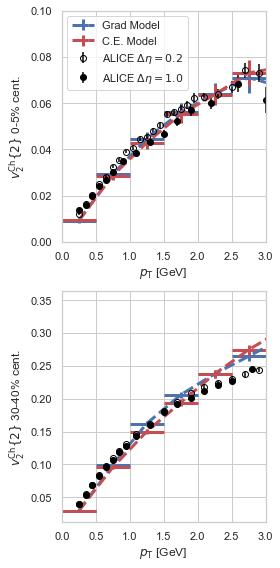

In [12]:

for icent, cent in enumerate(cent_bins):
    cent_str = str(cent[0]) + '-' + str(cent[1])
    for isp, sp in enumerate(species):
        for iidf, idf in enumerate([0, 1]):
            #load the pT bins
            pT_bin_edges = np.loadtxt(idf_label[idf] + vn_dir + 'pT_bin_edges')
            pT_bin_ctr = []
            pT_bin_width = []
            for x, y in zip(pT_bin_edges[0::], pT_bin_edges[1::]): 
                pT_bin_ctr.append( (x+y)/2. )
                pT_bin_width.append( (y-x)/2.)
            pT_bin_ctr = np.array(pT_bin_ctr)
    
            #load the spectra for pions, kaons, etc...
            spectra = {}
            spectra[sp] = np.loadtxt(idf_label[idf] + vn_dir + cent_str + '/' + sp + '_v2')
            y = spectra[sp][:, 0]
            dy = spectra[sp][:, 1]
            axes[icent].errorbar(pT_bin_ctr, y, yerr = dy, xerr = pT_bin_width, 
                                 label= idf_label[idf] + ' Model', color=colors[idf], 
                                 lw=3, ls='--')
            
            #axes[icent].fill_between(pT_bin_ctr, y - dy, y + dy, label= idf_label[idf] + ' Model', 
            #                         color=colors[idf], alpha=0.6)
            #axes[icent].fill_betweenx(y, pT_bin_ctr - pT_bin_width, pT_bin_ctr + pT_bin_width,  
            #                         color=colors[idf], alpha=0.6)
   
        axes[icent].set_xlim(0., 3.0)
        #axes[icent].set_title(r' Elliptic Flow ' + cent_str + '% Cent.')
        axes[icent].set_ylabel(r'$v^{\mathrm{Ch} }_2\{2\}$ '+ cent_str + '% cent.')
        axes[icent].set_xlabel(r'$p_{\mathrm{T}}$ [GeV]')
            
            
        #load the expt results
        spectra_expt = {}
        spectra_expt_2 = {} 
        spectra_expt[sp] = pd.read_csv(expt_dir + 'v_2_' + sp + '_' + cent_str + '.dat', skiprows=11, sep=' ')
        
        axes[icent].errorbar(spectra_expt[sp]['pT'], spectra_expt[sp]['y'], yerr = spectra_expt[sp]['dy'], 
                             marker='o', markeredgecolor='black', markerfacecolor="None", 
                             ls="None", ecolor='black', label=r'ALICE $\Delta \eta = 0.2$')
        
        spectra_expt_2[sp] = pd.read_csv(expt_dir + 'v_2_' + sp + '_' + cent_str + '_delta_eta_1.dat', 
                                         skiprows=11, sep=' ')
        
        axes[icent].errorbar(spectra_expt_2[sp]['pT'], spectra_expt_2[sp]['y'], yerr = spectra_expt_2[sp]['dy'], 
                             marker='o', markeredgecolor='black', markerfacecolor='black', 
                             ls="None", ecolor='black', label=r'ALICE $\Delta \eta = 1.0$')
axes[0].set_ylim(0., 0.1)            
axes[0].legend()        
#plt.suptitle('Predictions at MAP')
plt.tight_layout(True)
#set_tight(fig, rect=[0, 0, 1, .93])
plt.savefig('pT_diff_v2.png', dpi=400)
plt.show()


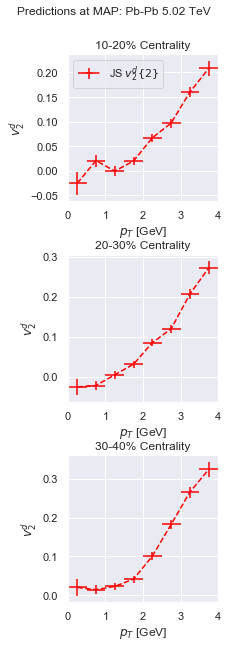

In [12]:
sp_labels = {'Ch' : 'ch', 'pion' : r'$\pi$', 'kaon' : r'$k$', 'proton' : r'$p$', 'd' : 'r$d$'}

n_harm = 2

matplotlib.rcParams.update({'font.size': 10})
cent_bins = [(10, 20), (20,30), (30, 40)]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3,9))
colors = ['black']
species = ['d']

vn_dir = '/Predictions/diff_vn/'
expt_dir = 'diff_d_vn_ALICE/Pb-Pb-5020/'


for icent, cent in enumerate(cent_bins):
    cent_str = str(cent[0]) + '-' + str(cent[1])
    for isp, sp in enumerate(species):
        for iidf, idf in enumerate([0]):
            #load the pT bins
            pT_bin_edges = np.loadtxt(idf_label[idf] + vn_dir + 'pT_bin_edges')
            pT_bin_ctr = []
            pT_bin_width = []
            for x, y in zip(pT_bin_edges[0::], pT_bin_edges[1::]): 
                pT_bin_ctr.append( (x+y)/2. )
                pT_bin_width.append( (y-x)/2.)
            pT_bin_ctr = np.array(pT_bin_ctr)
    
            #load the spectra for pions, kaons, etc...
            spectra = {}
            spectra[sp] = np.loadtxt(idf_label[idf] + vn_dir + cent_str + '/' + sp + '_v' + str(n_harm))
            y = spectra[sp][:, 0]
            dy = spectra[sp][:, 1]
            axes[icent].errorbar(pT_bin_ctr, y, yerr=dy, xerr=pT_bin_width, label= 'JS $v^{d}_'+str(n_harm)+'\{2\}$', 
                                     color='red', ls=idf_ls[idf])
            #mat = np.column_stack( (pT_bin_ctr, pT_bin_width, y, dy) )
            #np.savetxt('JS_Pb-Pb-5020_v2_d_' + cent_str + '.dat' , mat)
   
        axes[icent].set_xlim(0., 4.0)
        axes[icent].set_title(cent_str + '% Centrality')
        #axes[icent].set_ylabel(r'$v^{d}_2\{2\}$')
        axes[icent].set_ylabel(r'$v^{d}_2$')
        axes[icent].set_xlabel(r'$p_T$ [GeV]')
            
            
        #load the expt results
        try:
            spectra_expt = {}
            spectra_expt[sp] = pd.read_csv(expt_dir + 'v_'+str(n_harm)+'_' + sp + '_' + cent_str + '.dat', skiprows=11, sep=' ')
            yerr = np.sqrt( spectra_expt[sp]['sys+']**2. + spectra_expt[sp]['stat+']**2. )
            axes[icent].errorbar(spectra_expt[sp]['pT'], spectra_expt[sp]['v2'], yerr=yerr, 
                                 marker='o', markeredgecolor=colors[isp], markerfacecolor="None", 
                                 ls="None", ecolor=colors[isp], label=r'ALICE $v^{d}_2\{SP\}$')
        except:
            continue
           
axes[0].legend()        
plt.suptitle('Predictions at MAP: Pb-Pb 5.02 TeV')
plt.tight_layout(True)
set_tight(fig, rect=[0, 0, 1, .93])
plt.savefig('pT_diff_v2_d.png', dpi=300)
plt.show()